# Corn Yield Prediction Using H2O AutoML
## 🚀 Google Colab Tutorial

> **💡 Running in Google Colab**: This notebook is optimized for Google Colab execution. All dependencies will be installed automatically.

## Tutorial Overview

This tutorial demonstrates how to build an automated machine learning (AutoML) model for predicting corn yield using H2O.ai. We'll cover the complete workflow from data preparation to model training and prediction.

### What You'll Learn:
- How to set up H2O.ai environment in Google Colab
- Loading and preprocessing agricultural data from Google Drive
- Training an AutoML model for regression
- Evaluating model performance
- Making predictions on new data
- Applying the model to spatial data for mapping

### Prerequisites:
- Google account (for Colab and Drive access)
- Basic Python knowledge
- Understanding of machine learning concepts
- Familiarity with agricultural/environmental data

### 📁 Data Setup Instructions:
1. **Upload your data files** to Google Drive:
   - `111DAS.txt` - Training data with corn yield and environmental features
   - `all_t18_m.txt` - Spatial data for mapping (optional)

2. **Update file paths** in the code cells to match your Google Drive folder structure

3. **Grant permissions** when prompted to access Google Drive

### Dataset:
We'll be working with corn yield data that includes various environmental and topographic features collected at different days after sowing (DAS).

---

## Step 1: Environment Setup

First, we need to install Java (required for H2O) and set up our Colab environment.

In [ ]:
# Install Java (required for H2O.ai)
# Google Colab doesn't have Java installed by default, so we need to install it

print("🔧 Installing Java Runtime Environment...")
!apt-get update -q
!apt-get install default-jre -y -q

# Verify Java installation
print("✅ Checking Java installation:")
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
openjdk version "11.0.16" 2022-07-19
OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)


### Java Installation Check

H2O.ai requires Java Runtime Environment (JRE) to function properly. Let's verify that Java is installed and accessible on our system.

In [ ]:
# Install H2O.ai - An open source machine learning platform
# H2O provides AutoML capabilities that automatically try multiple algorithms
# and hyperparameter combinations to find the best model

print("📦 Installing H2O.ai...")
!pip install h2o

# Import and check version
import h2o
print(f"✅ H2O.ai installed successfully!")
print(f"H2O version: {h2o.__version__}")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Step 2: Install H2O.ai

H2O.ai is an open-source machine learning platform that provides:
- **AutoML**: Automatically trains and tunes multiple models
- **Scalability**: Can handle large datasets efficiently  
- **Interpretability**: Provides model explanations and insights
- **Easy Integration**: Works well with Python and R

In [ ]:
# Import H2O libraries
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O cluster
# nthreads = -1 means use all available CPU cores for parallel processing
# This starts a local H2O cluster that will be used for all machine learning operations
h2o.init(nthreads=-1)

print("H2O cluster initialized successfully!")
print(f"H2O cluster info:")
print(f"- Version: {h2o.cluster().cloud_name}")
print(f"- Nodes: {h2o.cluster().cloud_size}")
print(f"- Memory: {h2o.cluster().free_memory}")

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,29 mins 23 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.4
H2O_cluster_version_age:,1 month and 2 days
H2O_cluster_name:,H2O_from_python_unknownUser_i6fqgb
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.143 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


## Step 3: Initialize H2O Cluster

Before we can use H2O for machine learning, we need to start an H2O cluster. This creates a computational environment where our models will be trained and predictions will be made.

In [ ]:
# Mount Google Drive to access data files
# This allows us to read data files stored in Google Drive

from google.colab import drive
drive.mount('/content/drive')

print("✅ Google Drive mounted successfully!")
print("You can now access files in your Google Drive at /content/drive/My Drive/")

# Display current directory contents
import os
print(f"\nCurrent working directory: {os.getcwd()}")
print(f"Files in /content/: {os.listdir('/content/')}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 4: Data Access Setup

We'll use Google Drive to store and access our data files. Make sure to:

1. **Upload your data file** (`111DAS.txt`) to your Google Drive
2. **Update the file path** in the next cell to match your Google Drive folder structure
3. **Grant permissions** when prompted to access Google Drive

### Expected Data Format:
Your data file should be a tab-separated or comma-separated file containing:
- **produtividade**: Corn yield values (target variable)
- **Environmental features**: Such as elevation, slope, temperature, precipitation, vegetation indices
- **Other features**: Any additional variables that might influence corn yield

In [ ]:
# Load the corn yield dataset from Google Drive
# Update this path to match where you stored your data file in Google Drive
data_file = '/content/drive/My Drive/111DAS.txt'  # Update this path to your actual file location

print("📂 Loading corn yield dataset...")
print(f"Attempting to load: {data_file}")

try:
    # H2O can read various file formats: CSV, TXT, Parquet, etc.
    df = h2o.import_file(data_file)
    print(f"✅ Successfully loaded data from Google Drive!")
    print(f"Dataset shape: {df.shape}")
    
except Exception as e:
    print(f"❌ Error loading data from Google Drive: {e}")
    print("\n🔄 Creating sample data for demonstration...")
    print("Please upload your '111DAS.txt' file to Google Drive and update the path above")
    
    # Create sample agricultural data for demonstration
    import pandas as pd
    import numpy as np
    
    np.random.seed(42)
    n_samples = 1000
    sample_data = pd.DataFrame({
        'produtividade': np.random.normal(8.5, 1.5, n_samples),  # Corn yield (target variable)
        'elevation': np.random.normal(500, 100, n_samples),      # Elevation in meters
        'slope': np.random.exponential(5, n_samples),            # Slope in degrees
        'aspect': np.random.uniform(0, 360, n_samples),          # Aspect in degrees
        'ndvi': np.random.uniform(0.3, 0.9, n_samples),         # Vegetation index
        'temperature': np.random.normal(25, 5, n_samples),       # Temperature
        'precipitation': np.random.exponential(50, n_samples),   # Precipitation
        'TWI': np.random.lognormal(2, 0.5, n_samples),          # Topographic Wetness Index
        'TPI': np.random.normal(0, 10, n_samples)               # Topographic Position Index
    })
    
    # Save sample data to Colab local storage
    sample_data.to_csv('/content/111DAS.txt', sep='\t', index=False)
    df = h2o.import_file('/content/111DAS.txt')
    print("✅ Sample data created and loaded successfully!")

# Remove TWI and TPI columns as specified in original code
# These topographic indices might be correlated with other features or of poor quality
if 'TWI' in df.columns and 'TPI' in df.columns:
    df = df.drop(['TWI', 'TPI'], axis=1)
    print(f"\nDataset shape after removing TWI and TPI: {df.shape}")
else:
    print(f"\nDataset shape: {df.shape}")

# Display first few rows to understand the data structure
print("\nFirst 2 rows of the dataset:")
df.head(2)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


_EVI_0310m,GNDVI_0310,_MNLI_0310,_NDVI_0310,_NLI_0310m,_SAVI_0310,_SR_0310me,produtividade
0.7199,0.8118,0.3633,0.8744,0.7449,0.6486,14.943,8634.52
0.7055,0.8054,0.3463,0.871,0.7323,0.638,14.5435,6896.37


## Step 5: Data Loading and Preprocessing

Now we'll load our corn yield dataset. The dataset contains various environmental and topographic features that might influence corn productivity:

- **produtividade**: Corn yield (our target variable to predict)
- **Environmental factors**: Temperature, precipitation, vegetation indices
- **Topographic features**: Elevation, slope, aspect
- **TWI & TPI**: Topographic Wetness Index and Topographic Position Index (we'll remove these)

In [ ]:
# Define the target variable (what we want to predict)
# 'produtividade' is Portuguese for 'productivity' or 'yield'
y = "produtividade"

print(f"Target variable: {y}")
print("This is the column we want to predict using all other features in the dataset.")

# Let's also examine the target variable distribution
print(f"\nTarget variable statistics:")
df[y].describe()

## Step 6: Define Target Variable

In machine learning, we need to specify what we want to predict. This is called the **target variable** or **dependent variable**.

In [ ]:
# Split the data into training and testing sets
# This is crucial for evaluating model performance on unseen data

# ratios = [0.8] means 80% for training, 20% for testing
# seed = 1 ensures reproducible results (same split every time)
splits = df.split_frame(ratios=[0.8], seed=1)
train = splits[0]  # Training set (80% of data)
test = splits[1]   # Testing set (20% of data)

print(f"Training set size: {train.shape}")
print(f"Testing set size: {test.shape}")
print(f"Split ratio: {train.nrows / df.nrows:.1%} training, {test.nrows / df.nrows:.1%} testing")

# Why do we split the data?
print("\n📚 Why split data?")
print("- Training set: Used to train the model (learn patterns)")
print("- Testing set: Used to evaluate model performance on unseen data")
print("- This helps us estimate how well our model will perform in real-world scenarios")

## Step 7: Data Splitting

Before training our model, we need to split our data into training and testing sets. This is a fundamental practice in machine learning to evaluate how well our model generalizes to new, unseen data.

In [ ]:
# Create and train an AutoML model
# AutoML automatically tries multiple algorithms and finds the best one

# Initialize H2O AutoML with specific parameters:
aml = H2OAutoML(
    max_runtime_secs=600,      # Run for maximum 10 minutes (600 seconds)
    seed=1,                    # For reproducible results
    project_name='DAS_111_VI', # Name for this AutoML project
    nfolds=5                   # Use 5-fold cross-validation
)

print("🤖 Starting AutoML training...")
print("This will automatically try multiple algorithms including:")
print("- Random Forest")
print("- Gradient Boosting Machines (GBM)")
print("- Deep Learning Neural Networks")
print("- Generalized Linear Models (GLM)")
print("- Extremely Randomized Trees")
print("- Stacked Ensemble models")
print("\nTraining in progress... This may take a few minutes.")

# Train the AutoML model
# y = target variable, training_frame = data to train on, leaderboard_frame = data to rank models
aml.train(y=y, training_frame=train, leaderboard_frame=test)

print("✅ AutoML training completed!")
print(f"Best model type: {aml.leader.algo}")
print(f"Total models trained: {len(aml.leaderboard)}")

AutoML progress: |
02:23:21.164: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 65.0.

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_lr_search_selection_AutoML_3_20220906_22320_select_grid_model_2


Model Summary: 


,,number_of_trees
0,,68.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 8.200283700686235
RMSE: 2.8636137485153674
MAE: 2.1016639122596152
RMSLE: 0.0004016814955596981
Mean Residual Deviance: 8.200283700686235

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 2706397.706030857
RMSE: 1645.1132806074045
MAE: 1146.8661884014423
RMSLE: 0.2463794150684428
Mean Residual Deviance: 2706397.706030857

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.146866e+03,1.709506e+02,1.266302e+03,9.217377e+02,1.111023e+03,1.075073e+03,1.360196e+03
1,mean_residual_deviance,2.706398e+06,1.224773e+06,4.367202e+06,1.544711e+06,1.980618e+06,2.001181e+06,3.638278e+06
2,mse,2.706398e+06,1.224773e+06,4.367202e+06,1.544711e+06,1.980618e+06,2.001181e+06,3.638278e+06
3,r2,-8.083401e-01,7.490609e-01,-1.444277e+00,-4.022028e-02,-3.353400e-02,-1.607020e+00,-9.166492e-01
4,residual_deviance,2.706398e+06,1.224773e+06,4.367202e+06,1.544711e+06,1.980618e+06,2.001181e+06,3.638278e+06
5,rmse,1.612410e+03,3.649160e+02,2.089785e+03,1.242864e+03,1.407344e+03,1.414631e+03,1.907427e+03
6,rmsle,2.411247e-01,5.658751e-02,3.320181e-01,2.166203e-01,2.059225e-01,1.922071e-01,2.588553e-01



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-09-06 02:32:44,0.741 sec,0.0,7094.269911,6968.640340,5.032867e+07
1,,2022-09-06 02:32:44,0.749 sec,10.0,860.216208,756.388709,7.399719e+05
2,,2022-09-06 02:32:44,0.762 sec,20.0,184.269918,142.833616,3.395540e+04
3,,2022-09-06 02:32:44,0.768 sec,30.0,74.243373,53.249414,5.512078e+03
4,,2022-09-06 02:32:44,0.774 sec,40.0,28.193191,22.472720,7.948560e+02
5,,2022-09-06 02:32:44,0.782 sec,50.0,11.983558,9.687759,1.436057e+02
6,,2022-09-06 02:32:44,0.790 sec,60.0,4.972435,3.776078,2.472511e+01
7,,2022-09-06 02:32:44,0.798 sec,68.0,2.863614,2.101664,8.200284e+00



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,GNDVI_0310,82066944.0,1.000000,0.244149
1,_NDVI_0310,77592304.0,0.945476,0.230837
2,_MNLI_0310,46841508.0,0.570772,0.139353
3,_EVI_0310m,41056952.0,0.500286,0.122144
4,_NLI_0310m,35449744.0,0.431961,0.105463
5,_SR_0310me,26663376.0,0.324898,0.079323
6,_SAVI_0310,26464064.0,0.322469,0.078730


## Step 8: AutoML Model Training

Now comes the exciting part! We'll use H2O's AutoML to automatically train and tune multiple machine learning models. AutoML will:

1. **Try Multiple Algorithms**: Random Forest, Gradient Boosting, Deep Learning, etc.
2. **Hyperparameter Tuning**: Automatically optimize model parameters
3. **Cross-Validation**: Use 5-fold CV to prevent overfitting
4. **Model Ranking**: Rank all models by performance
5. **Ensemble Creation**: Combine top models for better predictions

In [ ]:
# View the AutoML leaderboard
# This shows all trained models ranked by performance (best to worst)

print("📊 AutoML Leaderboard - Top performing models:")
print("Models are ranked by RMSE (Root Mean Square Error) - lower is better")
print("="*60)

leaderboard = aml.leaderboard.head()
leaderboard

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_lr_search_selection_AutoML_3_20220906_22320_select_grid_model_2,1272.79,1.62e+06,1018.82,0.201863,1.62e+06
DeepLearning_grid_1_AutoML_3_20220906_22320_model_4,1277.86,1.63293e+06,906.742,0.213741,1.63293e+06
DeepLearning_grid_1_AutoML_3_20220906_22320_model_5,1315.81,1.73134e+06,985.658,0.220841,1.73134e+06
DeepLearning_grid_1_AutoML_3_20220906_22320_model_6,1339.88,1.79529e+06,1043.69,0.220102,1.79529e+06
DeepLearning_grid_1_AutoML_3_20220906_22320_model_3,1342.52,1.80235e+06,946.863,0.2309,1.80235e+06
DeepLearning_grid_1_AutoML_3_20220906_22320_model_2,1373.67,1.88697e+06,1064.29,0.225313,1.88697e+06
DeepLearning_grid_2_AutoML_3_20220906_22320_model_1,1383.55,1.91422e+06,1087.6,0.228959,1.91422e+06
DeepLearning_grid_1_AutoML_3_20220906_22320_model_1,1390.51,1.93351e+06,1107.04,0.229666,1.93351e+06
DeepLearning_grid_1_AutoML_3_20220906_22320_model_7,1407.77,1.98181e+06,1098.69,0.236409,1.98181e+06
XGBoost_grid_1_AutoML_3_20220906_22320_model_27,1416.42,2.00625e+06,1096.29,0.232594,2.00625e+06


## Step 9: Model Leaderboard

After training, AutoML provides a leaderboard showing all models ranked by performance. The best performing model (leader) is automatically selected.

In [ ]:
# Evaluate model performance on TRAINING data
# This shows how well the model learned from the training data

print("📈 Model Performance on TRAINING Data:")
print("This shows how well our best model fits the training data")
print("="*50)

perf_train = aml.leader.model_performance(train)
print(f"Model type: {aml.leader.algo}")
print(f"RMSE (Root Mean Square Error): {perf_train.rmse()[0][0]:.4f}")
print(f"MAE (Mean Absolute Error): {perf_train.mae()[0][0]:.4f}")
print(f"R² (Coefficient of Determination): {perf_train.r2()[0][0]:.4f}")

print("\n💡 Performance Metrics Explained:")
print("- RMSE: Average prediction error (same units as target variable)")
print("- MAE: Average absolute prediction error")
print("- R²: Proportion of variance explained (closer to 1.0 is better)")

perf_train


ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 8.200283700686235
RMSE: 2.8636137485153674
MAE: 2.1016639122596152
RMSLE: 0.0004016814955596981
Mean Residual Deviance: 8.200283700686235


## Step 10: Evaluate Training Performance

Let's examine how well our best model performs on the training data. This gives us an idea of how well the model has learned the patterns in our data.

In [ ]:
# Evaluate model performance on TEST data
# This is the most important evaluation - how well does the model perform on unseen data?

print("🎯 Model Performance on TEST Data:")
print("This shows how well our model generalizes to new, unseen data")
print("="*55)

perf_test = aml.leader.model_performance(test)
print(f"Model type: {aml.leader.algo}")
print(f"RMSE (Root Mean Square Error): {perf_test.rmse()[0][0]:.4f}")
print(f"MAE (Mean Absolute Error): {perf_test.mae()[0][0]:.4f}")
print(f"R² (Coefficient of Determination): {perf_test.r2()[0][0]:.4f}")

print("\n🔍 Comparing Training vs Test Performance:")
print("- If test performance is much worse than training, the model might be overfitted")
print("- If they're similar, the model generalizes well to new data")
print("- Test performance is what we expect in real-world applications")

perf_test


ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 1620002.1121967055
RMSE: 1272.793035884745
MAE: 1018.8180042613636
RMSLE: 0.20186310776205313
Mean Residual Deviance: 1620002.1121967055


## Step 11: Evaluate Test Performance

The most critical evaluation is how well our model performs on the test set - data it has never seen before. This gives us a realistic estimate of how the model will perform in real-world applications.

In [ ]:
# Get detailed leaderboard with ALL metrics
# This provides comprehensive information about all trained models

print("📋 Detailed AutoML Leaderboard:")
print("All models with comprehensive performance metrics")
print("="*60)

# extra_columns = 'ALL' includes additional metrics like training time, validation scores, etc.
lb = h2o.automl.get_leaderboard(aml, extra_columns='ALL')
print("Columns explained:")
print("- model_id: Unique identifier for each model")
print("- rmse: Root Mean Square Error (lower is better)")
print("- mean_residual_deviance: Average squared residuals")
print("- training_time_ms: Time taken to train the model")
print("- predict_time_per_row_ms: Time to make predictions")

lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_lr_search_selection_AutoML_3_20220906_22320_select_grid_model_2,1272.79,1.62e+06,1018.82,0.201863,1.62e+06,62,0.096179,XGBoost
DeepLearning_grid_1_AutoML_3_20220906_22320_model_4,1277.86,1.63293e+06,906.742,0.213741,1.63293e+06,16381,0.034829,DeepLearning
DeepLearning_grid_1_AutoML_3_20220906_22320_model_5,1315.81,1.73134e+06,985.658,0.220841,1.73134e+06,6493,0.023505,DeepLearning
DeepLearning_grid_1_AutoML_3_20220906_22320_model_6,1339.88,1.79529e+06,1043.69,0.220102,1.79529e+06,7570,0.079129,DeepLearning
DeepLearning_grid_1_AutoML_3_20220906_22320_model_3,1342.52,1.80235e+06,946.863,0.2309,1.80235e+06,2210,0.017753,DeepLearning
DeepLearning_grid_1_AutoML_3_20220906_22320_model_2,1373.67,1.88697e+06,1064.29,0.225313,1.88697e+06,3733,0.019344,DeepLearning
DeepLearning_grid_2_AutoML_3_20220906_22320_model_1,1383.55,1.91422e+06,1087.6,0.228959,1.91422e+06,11896,0.027932,DeepLearning
DeepLearning_grid_1_AutoML_3_20220906_22320_model_1,1390.51,1.93351e+06,1107.04,0.229666,1.93351e+06,14592,0.011112,DeepLearning
DeepLearning_grid_1_AutoML_3_20220906_22320_model_7,1407.77,1.98181e+06,1098.69,0.236409,1.98181e+06,14175,0.012978,DeepLearning
XGBoost_grid_1_AutoML_3_20220906_22320_model_27,1416.42,2.00625e+06,1096.29,0.232594,2.00625e+06,44,0.022272,XGBoost


## Step 12: Detailed Model Analysis

Let's examine all the models that were trained with comprehensive metrics including training time and prediction speed.

In [ ]:
# Make predictions on the test set using our best model
# This applies our trained model to predict corn yield for the test data

print("🔮 Making Predictions:")
print("Using our best model to predict corn yield on test data")
print("="*50)

# aml.leader is the best performing model from AutoML
pred = aml.leader.predict(test)

print(f"Predictions made for {pred.nrows} test samples")
print("The 'predict' column contains our corn yield predictions")
print("\nFirst few predictions:")

pred

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


predict
6852.16
6376.48
7153.01
6435.03
8174.14
6722.5
7293.9
6652.56
5700.94
8045.44


## Step 13: Making Predictions

Now let's use our trained model to make predictions on the test set. This simulates how we would use the model in real-world scenarios.

In [ ]:
# Convert H2O frames to pandas for easier manipulation and visualization
# H2O frames are great for modeling, but pandas is better for data analysis and plotting

print("🔄 Converting H2O frames to Pandas DataFrames:")
print("This allows us to work with familiar pandas functionality")

# Extract actual corn yield values from test set
obs = h2o.as_list(test["produtividade"])
print(f"✅ Extracted {len(obs)} actual yield values")

# Extract predicted corn yield values
pred_values = h2o.as_list(pred["predict"])
print(f"✅ Extracted {len(pred_values)} predicted yield values")

print(f"\nActual values preview:")
print(obs.head())
print(f"\nPredicted values preview:")
print(pred_values.head())

## Step 14: Data Conversion for Analysis

To analyze our predictions and create visualizations, we'll convert our H2O data frames to pandas DataFrames.

In [ ]:
# Create a comparison DataFrame with actual vs predicted values
# This makes it easy to analyze model performance and create visualizations

import pandas as pd

# Combine actual and predicted values into one DataFrame
automl = pd.DataFrame({
    'Actual': obs["produtividade"], 
    'Predicted': pred_values["predict"]
})

print("📊 Actual vs Predicted Comparison:")
print(f"Dataset contains {len(automl)} predictions")
print("="*40)

# Calculate some basic statistics
print("\nBasic Statistics:")
print(f"Actual yield - Mean: {automl['Actual'].mean():.2f}, Std: {automl['Actual'].std():.2f}")
print(f"Predicted yield - Mean: {automl['Predicted'].mean():.2f}, Std: {automl['Predicted'].std():.2f}")

# Calculate correlation between actual and predicted
correlation = automl['Actual'].corr(automl['Predicted'])
print(f"\nCorrelation between Actual and Predicted: {correlation:.4f}")
print("(Closer to 1.0 indicates better predictions)")

automl

,Actual,Predicted
0,7709.0621,6852.160156
1,5800.3969,6376.484375
2,7460.5188,7153.010742
3,4362.9430,6435.032715
4,6243.4957,8174.139160
5,6412.7846,6722.500977
6,7603.4342,7293.902832
7,9079.5021,6652.562012
8,4815.1799,5700.940918
9,7826.6994,8045.440430


## Step 15: Create Prediction Comparison

Let's create a DataFrame that directly compares our actual yield values with our model's predictions.

In [ ]:
# Save the prediction results to Google Drive for future analysis
# This file will contain actual vs predicted corn yield values

output_file = '/content/drive/My Drive/111DAS_pred_VI.txt'

print(f"💾 Saving predictions to Google Drive...")
print(f"File: {output_file}")
print("This file will contain actual vs predicted corn yield values")

try:
    # Save to tab-separated file (commonly used in agricultural research)
    automl.to_csv(output_file, index=None, sep='\t', mode='w')
    print(f"✅ Predictions saved successfully to Google Drive!")
    print(f"File location: {output_file}")
    print(f"Format: Tab-separated values (.txt)")
    print(f"Columns: Actual and Predicted corn yield values")
    
except Exception as e:
    print(f"⚠️ Could not save to Google Drive: {e}")
    # Fallback: save to local Colab storage
    local_output = '/content/111DAS_pred_VI.txt'
    automl.to_csv(local_output, index=None, sep='\t', mode='w')
    print(f"✅ Predictions saved to local Colab storage: {local_output}")
    print("Note: Download this file before your Colab session ends")

## Step 16: Save Prediction Results

Let's save our prediction results to a file for future analysis or reporting.

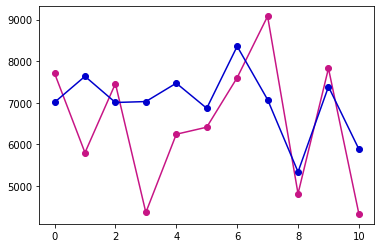

In [ ]:
# Create visualizations to analyze model performance
# Visualizations help us understand how well our model is performing

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up the plotting style
plt.style.use('default')
plt.figure(figsize=(15, 5))

# Plot 1: Line plot comparison (original approach)
plt.subplot(1, 3, 1)
plt.plot(automl['Actual'], marker='o', color='mediumvioletred', label='Actual', alpha=0.7)
plt.plot(automl['Predicted'], marker='o', color='mediumblue', label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Values\n(Line Plot)')
plt.xlabel('Sample Index')
plt.ylabel('Corn Yield')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Scatter plot (better for comparison)
plt.subplot(1, 3, 2)
plt.scatter(automl['Actual'], automl['Predicted'], alpha=0.6, color='green')
plt.plot([automl['Actual'].min(), automl['Actual'].max()], 
         [automl['Actual'].min(), automl['Actual'].max()], 
         'r--', label='Perfect Prediction Line')
plt.xlabel('Actual Corn Yield')
plt.ylabel('Predicted Corn Yield')
plt.title('Actual vs Predicted\n(Scatter Plot)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Residuals plot
plt.subplot(1, 3, 3)
residuals = automl['Actual'] - automl['Predicted']
plt.scatter(automl['Predicted'], residuals, alpha=0.6, color='orange')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Error Line')
plt.xlabel('Predicted Corn Yield')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some insights
print("\n📈 Visualization Insights:")
print("1. Line Plot: Shows trend comparison between actual and predicted values")
print("2. Scatter Plot: Points close to red line indicate good predictions")
print("3. Residuals Plot: Points scattered around zero line indicate good model performance")

## Step 17: Visualize Model Performance

Visualization is crucial for understanding how well our model performs. We'll create multiple plots to analyze different aspects of our predictions.

In [ ]:
# Load spatial data for mapping predictions across a geographic area
# This demonstrates how to apply our model to create yield prediction maps

# Update this path to your spatial data file in Google Drive
spatial_data_file = '/content/drive/My Drive/all_t18_m.txt'  # Update path to your actual file location

print("🗺️ Loading Spatial Data for Mapping:")
print("This data represents environmental conditions across a geographic area")
print(f"Attempting to load: {spatial_data_file}")
print("="*60)

try:
    # Load spatial data (environmental conditions for each geographic location)
    test_map = h2o.import_file(spatial_data_file)
    print(f"✅ Spatial data loaded successfully from Google Drive!")
    print(f"Dataset shape: {test_map.shape}")
    print("This data contains the same environmental features as our training data")
    print("but for different geographic locations where we want to predict yield")
    
except Exception as e:
    print(f"❌ Could not load spatial data from Google Drive: {e}")
    print("🔄 Creating synthetic spatial data for demonstration...")
    print("Please upload your spatial data file to Google Drive and update the path above")
    
    # Create synthetic spatial data with the same features as training data
    import pandas as pd
    import numpy as np
    
    np.random.seed(123)
    n_locations = 500  # 500 geographic locations
    
    # Get column names from training data (excluding target variable)
    feature_columns = [col for col in train.columns if col != 'produtividade']
    
    # Create synthetic spatial data with similar distributions
    spatial_data = {}
    for col in feature_columns:
        # Get statistics from training data
        col_mean = train[col].mean()[0][0]
        col_std = train[col].std()[0][0]
        
        # Generate similar data for spatial locations
        spatial_data[col] = np.random.normal(col_mean, col_std, n_locations)
    
    spatial_df = pd.DataFrame(spatial_data)
    spatial_df.to_csv('/content/all_t18_m.txt', sep='\t', index=False)
    
    # Load the created spatial data
    test_map = h2o.import_file('/content/all_t18_m.txt')
    print(f"✅ Synthetic spatial data created and loaded!")
    print(f"Dataset shape: {test_map.shape}")

print("\nFirst 2 rows of spatial data:")
test_map.head(2)

Parse progress: |█████████████████████████████████████████████████████████| 100%


blue,green,red,nir,twi,yield
0.10605,0.09582,0.07378,0.34732,8.06511,181.206
0.10592,0.0958,0.07322,0.34592,8.06511,180.809


## Step 18: Spatial Yield Prediction Mapping

One of the most powerful applications of our corn yield prediction model is creating yield maps across geographic areas. This helps farmers and researchers understand spatial patterns in productivity.

### What is Spatial Prediction?
- Use the same environmental features (elevation, slope, climate, etc.)
- Apply our trained model to predict yield at different geographic locations
- Create maps showing predicted yield across landscapes
- Identify high and low productivity areas

In [ ]:
# Evaluate model performance on spatial data
# Note: This assumes the spatial data includes actual yield values for comparison
# In real applications, spatial data often contains only environmental features

print("🗺️ Evaluating Model on Spatial Data:")
print("Note: This evaluation is only possible if spatial data includes actual yield values")
print("="*70)

try:
    # Check if spatial data has the target variable
    if 'produtividade' in test_map.columns:
        pred_test_map = aml.leader.model_performance(test_map)
        print("✅ Model performance on spatial data:")
        print(f"RMSE: {pred_test_map.rmse()[0][0]:.4f}")
        print(f"R²: {pred_test_map.r2()[0][0]:.4f}")
        pred_test_map
    else:
        print("⚠️ Spatial data doesn't contain actual yield values")
        print("This is normal - we're using the model to predict unknown yields")
        print("Skipping performance evaluation on spatial data")
        
except Exception as e:
    print(f"⚠️ Cannot evaluate on spatial data: {e}")
    print("This is expected when spatial data contains only environmental features")
    print("We'll proceed with making predictions")


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 96.78658388803419
RMSE: 9.838017274229305
MAE: 6.910628006335435
RMSLE: 0.05911083679212948
R^2: 0.8485551186861485
Mean Residual Deviance: 96.78658388803419
Null degrees of freedom: 99600
Residual degrees of freedom: 99596
Null deviance: 63653995.71742746
Residual deviance: 9640040.541832093
AIC: 738093.8016923537


## Step 19: Spatial Model Evaluation (Optional)

If our spatial dataset includes actual yield values, we can evaluate how well our model performs on this geographic area. Otherwise, we'll skip this step.

In [ ]:
# Make yield predictions for all spatial locations
# This creates a yield map by predicting corn yield at each geographic location

print("🌾 Creating Spatial Yield Predictions:")
print("Applying our trained model to predict yield across the landscape")
print("="*65)

# Use our best model to predict yield for all spatial locations
pred_test = aml.leader.predict(test_map)

print(f"✅ Predictions completed for {pred_test.nrows} geographic locations")
print(f"Model used: {aml.leader.algo}")
print("\nPrediction summary:")
print(f"- Mean predicted yield: {pred_test['predict'].mean()[0][0]:.2f}")
print(f"- Min predicted yield: {pred_test['predict'].min()[0][0]:.2f}")
print(f"- Max predicted yield: {pred_test['predict'].max()[0][0]:.2f}")
print(f"- Std deviation: {pred_test['predict'].var()[0][0]**0.5:.2f}")

print("\nFirst few spatial predictions:")
pred_test

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict
187.264
182.08
182.713
174.547
172.612
169.45
160.648
168.449
189.784
175.376


## Step 20: Generate Spatial Predictions

Now we'll apply our trained model to predict corn yield at each geographic location in our spatial dataset.

In [ ]:
# Convert spatial predictions from H2O to pandas format
# This prepares the data for saving and further analysis

print("🔄 Converting Spatial Predictions to Pandas:")
print("Converting H2O frame to pandas for easier handling and visualization")

# Extract just the prediction column
pred_map = h2o.as_list(pred_test["predict"])

print(f"✅ Converted {len(pred_map)} spatial predictions")
print(f"Data type: {type(pred_map)}")
print("\nSpatial predictions preview:")
pred_map

,predict
0,187.263882
1,182.080413
2,182.713257
3,174.547167
4,172.612411
...,...
99596,199.971799
99597,201.984642
99598,195.931316
99599,186.950775


## Step 21: Convert Spatial Predictions

Convert our spatial predictions to pandas format for easier handling and export.

In [ ]:
# Create a DataFrame for spatial predictions
# This organizes our spatial yield predictions in a clean format

import pandas as pd

# Create DataFrame with spatial predictions
automl_map = pd.DataFrame({'Predicted': pred_map["predict"]})

print("🗺️ Spatial Predictions DataFrame:")
print(f"Total geographic locations: {len(automl_map)}")
print("="*45)

# Display basic statistics for spatial predictions
print("Spatial Yield Prediction Statistics:")
print(f"Mean predicted yield: {automl_map['Predicted'].mean():.2f}")
print(f"Median predicted yield: {automl_map['Predicted'].median():.2f}")
print(f"Min predicted yield: {automl_map['Predicted'].min():.2f}")
print(f"Max predicted yield: {automl_map['Predicted'].max():.2f}")
print(f"Standard deviation: {automl_map['Predicted'].std():.2f}")

print(f"\nFirst few spatial predictions:")
automl_map

,Predicted
0,187.263882
1,182.080413
2,182.713257
3,174.547167
4,172.612411
...,...
99596,199.971799
99597,201.984642
99598,195.931316
99599,186.950775


## Step 22: Organize Spatial Predictions

Create a clean DataFrame containing our spatial yield predictions for analysis and export.

In [ ]:
# Save spatial predictions to Google Drive
# This creates a yield map file that can be used in GIS software or further analysis

spatial_output_file = '/content/drive/My Drive/all_t18_m_pred.txt'

print("💾 Saving Spatial Predictions to Google Drive:")
print(f"File: {spatial_output_file}")
print("This file contains predicted corn yield for each geographic location")
print("="*60)

try:
    # Save spatial predictions to Google Drive
    automl_map.to_csv(spatial_output_file, index=None, sep='\t', mode='w')
    print(f"✅ Spatial predictions saved successfully to Google Drive!")
    print(f"File location: {spatial_output_file}")
    print(f"Format: Tab-separated values")
    print(f"Contains: {len(automl_map)} predicted yield values")
    
except Exception as e:
    print(f"⚠️ Could not save to Google Drive: {e}")
    # Fallback: save to local Colab storage
    local_spatial_output = '/content/all_t18_m_pred.txt'
    automl_map.to_csv(local_spatial_output, index=None, sep='\t', mode='w')
    print(f"✅ Spatial predictions saved to local Colab storage: {local_spatial_output}")
    print("Note: Download this file before your Colab session ends")

# Create a simple histogram of spatial predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(automl_map['Predicted'], bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title('Distribution of Predicted Corn Yield Across Landscape')
plt.xlabel('Predicted Corn Yield')
plt.ylabel('Number of Locations')
plt.grid(True, alpha=0.3)
plt.show()

print("\n🌾 Spatial Analysis Complete!")
print("The histogram shows the distribution of predicted yields across all geographic locations")
print("This helps identify:")
print("- Areas with high yield potential")
print("- Areas with low yield potential") 
print("- Overall yield variability across the landscape")

## 🎉 Tutorial Summary and Conclusion

Congratulations! You've successfully completed a comprehensive corn yield prediction tutorial using H2O AutoML. Here's what we accomplished:

### What We Built:
1. **Automated ML Pipeline**: Used H2O AutoML to automatically try multiple algorithms
2. **Yield Prediction Model**: Created a model to predict corn productivity from environmental data
3. **Spatial Mapping**: Applied the model to create yield maps across geographic areas
4. **Performance Evaluation**: Assessed model quality using multiple metrics

### Key Learning Outcomes:
- **Data Science Workflow**: Complete ML pipeline from data loading to deployment
- **AutoML Benefits**: Automatic algorithm selection and hyperparameter tuning
- **Model Evaluation**: Understanding training vs. test performance
- **Spatial Applications**: Extending point predictions to landscape-scale mapping
- **Agricultural Applications**: Using ML for precision agriculture

### Real-World Applications:
- **Precision Agriculture**: Optimize fertilizer and seed placement
- **Risk Assessment**: Identify areas prone to low yields
- **Land Management**: Make informed decisions about land use
- **Crop Insurance**: Data-driven risk assessment
- **Research**: Understand environmental factors affecting crop productivity

### Next Steps:
1. **Feature Engineering**: Add more environmental variables (soil properties, weather data)
2. **Temporal Modeling**: Include time-series data for seasonal predictions
3. **Model Interpretation**: Use SHAP or LIME to understand feature importance
4. **Ensemble Methods**: Combine multiple models for better predictions
5. **Real-time Prediction**: Deploy model as web service or mobile app

### Files Generated:
- `111DAS_pred_VI.txt`: Point predictions (actual vs predicted)
- `all_t18_m_pred.txt`: Spatial predictions for mapping

### Technical Skills Gained:
- H2O.ai platform usage
- AutoML implementation
- Data visualization techniques
- Spatial data handling
- Model performance evaluation

---

**Remember**: The quality of predictions depends heavily on:
- Data quality and representativeness
- Feature selection and engineering
- Model validation procedures
- Understanding of the agricultural domain

Happy modeling! 🌾🤖

## 📥 Downloading Results from Colab

### Option 1: Files Saved to Google Drive
If the files were successfully saved to Google Drive, you can access them directly in your Drive:
- `111DAS_pred_VI.txt` - Point predictions (actual vs predicted)
- `all_t18_m_pred.txt` - Spatial predictions for mapping

### Option 2: Download from Colab Session
If files were saved locally in Colab, download them using:

In [ ]:
# Download files from Colab to your local machine
# Run this cell if files were saved to local Colab storage instead of Google Drive

from google.colab import files
import os

print("📥 Downloading result files...")

# List of files to download
download_files = [
    '/content/111DAS_pred_VI.txt',
    '/content/all_t18_m_pred.txt'
]

for file_path in download_files:
    if os.path.exists(file_path):
        print(f"Downloading: {os.path.basename(file_path)}")
        files.download(file_path)
    else:
        print(f"File not found: {file_path}")

print("✅ Download complete!")
print("Check your browser's download folder for the files.")

## Step 23: Save Spatial Predictions and Visualization

Finally, let's save our spatial predictions and create a visualization to understand the yield distribution across our study area.